___
# Ciência dos Dados - PROJETO 1


### <font color=Grey>Guilherme Lotaif e Bruno Kaczelnik</font>
___

## Estudo dos brasileiros mais economicamente ativos

___
## Introdução

Neste projeto nós vamos analisar os dados da PNAD (Pesquisa Nacional por Amostra de Domicílios), que investiga anualmente as características da população. Este levantamento é um importante instrumento para o estudo socioeconômico do Brasil. 

A partir dos dados de 2011 e 2015 vamos fazer um estudo para identificar dentro do perfil dos `brasileiros economicamente ativos`, quais são os grupos sociais com **maior número de pessoas ativas**.


___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import warnings
import matplotlib.cbook
plt.style.use('ggplot')

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\PCDELL\Desktop\insper\CDD\projeto1


...
### Vamos abrir os arquivos:

Os arquivos que serão usados nesse projeto são 2 arquivos csv, com todas informações coletadas pela PNAD, esses dados precisarão ser formatados visando fazer a análise dos mesmos.

In [3]:
#Abrindo o arquivo com os dados de 2011:
All_data_2011 = pd.read_csv('PES2011.csv',sep=',')

In [4]:
#Analisando os tipos de informações no arquivo:
All_data_2011.get_dtype_counts()

float64    294
int64       30
dtype: int64

In [5]:
#Tabela do dataset(2011) pré-formatação:
All_data_2011.sample(2)

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
349585,2011,52,52000000.0,4,2,4,8,9,1947,64,...,4.0,436.0,3.0,2,2.0,NaN,NaN,2.0,600.0,20100000.0
90255,2011,23,23000000.0,17,3,2,29,8,1985,26,...,6.0,207.0,2.0,3,1.0,2.0,2.0,1.0,207.0,20100000.0


In [6]:
#Abrindo o arquivo com os dados de 2015:
All_data_2015 = pd.read_csv('PES2015.csv',sep=',')

In [7]:
#Analisando os tipos de informações no arquivo:
All_data_2015.get_dtype_counts()

float64    296
int64       33
dtype: int64

In [8]:
#Tabela do dataset(2015) pré-formatação:
All_data_2015.sample(2)

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
152063,152063,2015,29,5175,10,3,2,23,2,1998,...,3.0,5.250000e+02,3.0,2,1.0,2.0,2.0,1.0,5.250000e+02,20161117
295759,295759,2015,43,665,12,4,4,3,11,2011,...,4.0,1.000000e+12,99.0,1,NaN,NaN,NaN,NaN,1.000000e+12,20161117


...
### Vamos selecionar as váriaveis pertinentes para 2011:

In [9]:
#Vamos criar um dataframe com as váriaveis selecionadas:
df = ["UF","V0302","V8005","V0404","V0601","V6007","V9532","V9058","V9891","V4704"]

In [10]:
#Renomeando as colunas do dataframe:
df_2011 = All_data_2011[df]
df_2011.columns = ["UF", "Sexo", "Idade do morador", "Cor ou raça", "Sabe ler e escrever", "Curso mais elevado que cursou","Rendimento mensal",
        "Número de horas trabalhadas por semana no trabalho", "Idade com que começou a trabalhar", "Condição de atividade"]

...
#### Atribuindo as características das váriaveis:

In [11]:
#Suprimindo o aviso de copia de dataframe:
pd.set_option('chained_assignment',None)

In [12]:
#-UF:
df_2011.loc[(df_2011["UF"] == 11),"UF"] = "Rondônia"
df_2011.loc[(df_2011["UF"] == 12),"UF"] = "Acre"
df_2011.loc[(df_2011["UF"] == 13),"UF"] = "Amazonas"
df_2011.loc[(df_2011["UF"] == 14),"UF"] = "Roraima"
df_2011.loc[(df_2011["UF"] == 15),"UF"] = "Pará"
df_2011.loc[(df_2011["UF"] == 16),"UF"] = "Amapá"
df_2011.loc[(df_2011["UF"] == 17),"UF"] = "Tocantins"
df_2011.loc[(df_2011["UF"] == 21),"UF"] = "Maranhão"
df_2011.loc[(df_2011["UF"] == 22),"UF"] = "Piauí"
df_2011.loc[(df_2011["UF"] == 23),"UF"] = "Ceará"
df_2011.loc[(df_2011["UF"] == 24),"UF"] = "Rio Grande do Norte"
df_2011.loc[(df_2011["UF"] == 25),"UF"] = "Praíba"
df_2011.loc[(df_2011["UF"] == 26),"UF"] = "Pernambuco"
df_2011.loc[(df_2011["UF"] == 27),"UF"] = "Alagoas"
df_2011.loc[(df_2011["UF"] == 28),"UF"] = "Sergipe"
df_2011.loc[(df_2011["UF"] == 29),"UF"] = "Bahia"
df_2011.loc[(df_2011["UF"] == 31),"UF"] = "Minas Gerais"
df_2011.loc[(df_2011["UF"] == 32),"UF"] = "Espirito Santo"
df_2011.loc[(df_2011["UF"] == 33),"UF"] = "Rio de Janeiro"
df_2011.loc[(df_2011["UF"] == 35),"UF"] = "São Paulo"
df_2011.loc[(df_2011["UF"] == 41),"UF"] = "Paraná"
df_2011.loc[(df_2011["UF"] == 42),"UF"] = "Santa Catarina"
df_2011.loc[(df_2011["UF"] == 43),"UF"] = "Rio Grande do Sul"
df_2011.loc[(df_2011["UF"] == 50),"UF"] = "Mato Grosso do Sul"
df_2011.loc[(df_2011["UF"] == 51),"UF"] = "Mato Grosso"
df_2011.loc[(df_2011["UF"] == 52),"UF"] = "Goiás"
df_2011.loc[(df_2011["UF"] == 53),"UF"] = "Distrito Federal"

In [13]:
#-Sexo:
df_2011.loc[(df_2011.Sexo == 2),"Sexo"] = "Masculino"
df_2011.loc[(df_2011.Sexo == 4),"Sexo"] = "Feminino"

In [14]:
#-Cor ou raça:
df_2011.loc[(df_2011["Cor ou raça"] == 2),"Cor ou raça"] = "Branca"
df_2011.loc[(df_2011["Cor ou raça"] == 4),"Cor ou raça"] = "Preta"
df_2011.loc[(df_2011["Cor ou raça"] == 6),"Cor ou raça"] = "Amarela"
df_2011.loc[(df_2011["Cor ou raça"] == 8),"Cor ou raça"] = "Pardo"
df_2011.loc[(df_2011["Cor ou raça"] == 0),"Cor ou raça"] = "Indigena"
df_2011.loc[(df_2011["Cor ou raça"] == 9),"Cor ou raça"] = "Sem declaração"

In [15]:
#-Sabe ler e escrever:
df_2011.loc[(df_2011["Sabe ler e escrever"] == 1),"Sabe ler e escrever"] = "Sim"
df_2011.loc[(df_2011["Sabe ler e escrever"] == 3),"Sabe ler e escrever"] = "Não"

In [16]:
#-Curso mais elevado que cursou:
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 1),"Curso mais elevado que cursou"] = "Elementar (Primário)"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 2),"Curso mais elevado que cursou"] = "Médio 1˚ ciclo"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 3),"Curso mais elevado que cursou"] = "Médio 2˚ ciclo"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 4),"Curso mais elevado que cursou"] = "Regular do ensino Fundamental"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 5),"Curso mais elevado que cursou"] = "Regular do ensino Médio"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 6),"Curso mais elevado que cursou"] = "Supletivo do ensino Fundamental"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 7),"Curso mais elevado que cursou"] = "Supletivo do ensino Médio"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 8),"Curso mais elevado que cursou"] = "Superior de graduação"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 9),"Curso mais elevado que cursou"] = "Mestrado ou doutorado"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 10),"Curso mais elevado que cursou"] = "Alfabetização para jovens adultos"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 11),"Curso mais elevado que cursou"] = "Creche"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 12),"Curso mais elevado que cursou"] = "Classe de alfabetização - CA"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 13),"Curso mais elevado que cursou"] = "Jardim da infância"
df_2011.loc[(df_2011["Curso mais elevado que cursou"].isnull() == True),"Curso mais elevado que cursou"] = "Não aplicável"

In [17]:
#-Rendimento mensal: 
df_2011["Rendimento mensal"].loc[df_2011["Rendimento mensal"]>=999999999999]="Sem declarações"
df_2011.loc[(df_2011["Rendimento mensal"].isnull() == True),"Rendimento mensal"] = "Não aplicável"

In [18]:
#-Número de horas trabalhadas por semana no trabalho principal:
df_2011.loc[(df_2011["Número de horas trabalhadas por semana no trabalho"].isnull() == True),"Número de horas trabalhadas por semana no trabalho"] = "Não aplicável"

In [19]:
#-Idade com que começou a trabalhar:
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 1),"Idade com que começou a trabalhar"] = "Até 9 anos"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 2),"Idade com que começou a trabalhar"] = "10 a 14 anos"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 3),"Idade com que começou a trabalhar"] = "15 a 17 anos"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 4),"Idade com que começou a trabalhar"] = "18 a 19 anos"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 5),"Idade com que começou a trabalhar"] = "20 a 24 anos"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 6),"Idade com que começou a trabalhar"] = "25 a 29 anos"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 7),"Idade com que começou a trabalhar"] = "30 anos ou  mais"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"].isnull() == True),"Idade com que começou a trabalhar"] = "Não aplicável"

In [20]:
#-Condição de atividade:
df_2011.loc[(df_2011["Condição de atividade"] == 1),"Condição de atividade"] = "Economicamente ativas"
df_2011.loc[(df_2011["Condição de atividade"] == 2),"Condição de atividade"] = "Não economicamente ativas"
df_2011.loc[(df_2011["Condição de atividade"].isnull() == True),"Condição de atividade"] = "Não aplicável"

In [21]:
#Tabela do dataset(2011) pós-formatação:
df_2011.sample(30)

,UF,Sexo,Idade do morador,Cor ou raça,Sabe ler e escrever,Curso mais elevado que cursou,Rendimento mensal,Número de horas trabalhadas por semana no trabalho,Idade com que começou a trabalhar,Condição de atividade
43219,Pará,Masculino,11,Pardo,Sim,Não aplicável,120,20,10 a 14 anos,Economicamente ativas
5299,Rondônia,Masculino,56,Branca,Sim,Regular do ensino Fundamental,540,40,10 a 14 anos,Economicamente ativas
46359,Pará,Masculino,37,Pardo,Sim,Regular do ensino Fundamental,550,40,10 a 14 anos,Economicamente ativas
199777,Espirito Santo,Masculino,19,Pardo,Sim,Regular do ensino Fundamental,545,48,18 a 19 anos,Economicamente ativas
319938,Rio Grande do Sul,Masculino,38,Branca,Sim,Regular do ensino Médio,2000,40,15 a 17 anos,Economicamente ativas
167493,Minas Gerais,Feminino,21,Pardo,Sim,Regular do ensino Médio,545,44,18 a 19 anos,Economicamente ativas
190209,Minas Gerais,Feminino,20,Pardo,Sim,Regular do ensino Médio,190,16,15 a 17 anos,Economicamente ativas
317582,Rio Grande do Sul,Feminino,23,Branca,Sim,Regular do ensino Médio,1040,44,15 a 17 anos,Economicamente ativas
210004,Rio de Janeiro,Masculino,49,Branca,Sim,Regular do ensino Fundamental,2600,48,18 a 19 anos,Economicamente ativas
196700,Espirito Santo,Masculino,21,Branca,Sim,Regular do ensino Médio,545,40,10 a 14 anos,Economicamente ativas


...
### Vamos selecionar as váriaveis pertinentes para 2015:

In [22]:
#Vamos criar um dataframe com as váriaveis selecionadas:
df = ["UF","V0302","V8005","V0404","V0601","V6007","V9058","V9891","V4704"]

In [23]:
#Renomeando as colunas do dataframe:
df_2015 = All_data_2015[df]
df_2015.columns = ["UF", "Sexo", "Idade do morador", "Cor ou raça", "Sabe ler e escrever", "Curso mais elevado que cursou",
        "Número de horas trabalhadas por semana no trabalho", "Idade com que começou a trabalhar", "Condição de atividade"]

...
#### Atribuindo as características das váriaveis:

In [24]:
#-UF:
df_2015.loc[(df_2015["UF"] == 11),"UF"] = "Rondônia"
df_2015.loc[(df_2015["UF"] == 12),"UF"] = "Acre"
df_2015.loc[(df_2015["UF"] == 13),"UF"] = "Amazonas"
df_2015.loc[(df_2015["UF"] == 14),"UF"] = "Roraima"
df_2015.loc[(df_2015["UF"] == 15),"UF"] = "Pará"
df_2015.loc[(df_2015["UF"] == 16),"UF"] = "Amapá"
df_2015.loc[(df_2015["UF"] == 17),"UF"] = "Tocantins"
df_2015.loc[(df_2015["UF"] == 21),"UF"] = "Maranhão"
df_2015.loc[(df_2015["UF"] == 22),"UF"] = "Piauí"
df_2015.loc[(df_2015["UF"] == 23),"UF"] = "Ceará"
df_2015.loc[(df_2015["UF"] == 24),"UF"] = "Rio Grande do Norte"
df_2015.loc[(df_2015["UF"] == 25),"UF"] = "Praíba"
df_2015.loc[(df_2015["UF"] == 26),"UF"] = "Pernambuco"
df_2015.loc[(df_2015["UF"] == 27),"UF"] = "Alagoas"
df_2015.loc[(df_2015["UF"] == 28),"UF"] = "Sergipe"
df_2015.loc[(df_2015["UF"] == 29),"UF"] = "Bahia"
df_2015.loc[(df_2015["UF"] == 31),"UF"] = "Minas Gerais"
df_2015.loc[(df_2015["UF"] == 32),"UF"] = "Espirito Santo"
df_2015.loc[(df_2015["UF"] == 33),"UF"] = "Rio de Janeiro"
df_2015.loc[(df_2015["UF"] == 35),"UF"] = "São Paulo"
df_2015.loc[(df_2015["UF"] == 41),"UF"] = "Paraná"
df_2015.loc[(df_2015["UF"] == 42),"UF"] = "Santa Catarina"
df_2015.loc[(df_2015["UF"] == 43),"UF"] = "Rio Grande do Sul"
df_2015.loc[(df_2015["UF"] == 50),"UF"] = "Mato Grosso do Sul"
df_2015.loc[(df_2015["UF"] == 51),"UF"] = "Mato Grosso"
df_2015.loc[(df_2015["UF"] == 52),"UF"] = "Goiás"
df_2015.loc[(df_2015["UF"] == 53),"UF"] = "Distrito Federal"

In [25]:
#-Sexo:
df_2015.loc[(df_2015.Sexo == 2),"Sexo"] = "Masculino"
df_2015.loc[(df_2015.Sexo == 4),"Sexo"] = "Feminino"

In [26]:
#-Cor ou raça:
df_2015.loc[(df_2015["Cor ou raça"] == 2),"Cor ou raça"] = "Branca"
df_2015.loc[(df_2015["Cor ou raça"] == 4),"Cor ou raça"] = "Preta"
df_2015.loc[(df_2015["Cor ou raça"] == 6),"Cor ou raça"] = "Amarela"
df_2015.loc[(df_2015["Cor ou raça"] == 8),"Cor ou raça"] = "Pardo"
df_2015.loc[(df_2015["Cor ou raça"] == 0),"Cor ou raça"] = "Indigena"
df_2015.loc[(df_2015["Cor ou raça"] == 9),"Cor ou raça"] = "Sem declaração"

In [27]:
#-Sabe ler e escrever:
df_2015.loc[(df_2015["Sabe ler e escrever"] == 1),"Sabe ler e escrever"] = "Sim"
df_2015.loc[(df_2015["Sabe ler e escrever"] == 3),"Sabe ler e escrever"] = "Não"

In [28]:
#-Curso mais elevado que cursou:
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 1),"Curso mais elevado que cursou"] = "Elementar (Primário)"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 2),"Curso mais elevado que cursou"] = "Médio 1˚ ciclo"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 3),"Curso mais elevado que cursou"] = "Médio 2˚ ciclo"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 4),"Curso mais elevado que cursou"] = "Regular do ensino Fundamental"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 5),"Curso mais elevado que cursou"] = "Regular do ensino Médio"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 6),"Curso mais elevado que cursou"] = "Supletivo do ensino Fundamental"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 7),"Curso mais elevado que cursou"] = "Supletivo do ensino Médio"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 8),"Curso mais elevado que cursou"] = "Superior de graduação"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 9),"Curso mais elevado que cursou"] = "Mestrado ou doutorado"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 10),"Curso mais elevado que cursou"] = "Alfabetização para jovens adultos"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 11),"Curso mais elevado que cursou"] = "Creche"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 12),"Curso mais elevado que cursou"] = "Classe de alfabetização - CA"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 13),"Curso mais elevado que cursou"] = "Jardim da infância"
df_2015.loc[(df_2015["Curso mais elevado que cursou"].isnull() == True),"Curso mais elevado que cursou"] = "Não aplicável"

In [29]:
#-Número de horas trabalhadas por semana no trabalho principal:
df_2015.loc[(df_2015["Número de horas trabalhadas por semana no trabalho"].isnull() == True),"Número de horas trabalhadas por semana no trabalho"] = "Não aplicável"

In [30]:
#-Idade com que começou a trabalhar:
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 1),"Idade com que começou a trabalhar"] = "Até 9 anos"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 2),"Idade com que começou a trabalhar"] = "10 a 14 anos"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 3),"Idade com que começou a trabalhar"] = "15 a 17 anos"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 4),"Idade com que começou a trabalhar"] = "18 a 19 anos"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 5),"Idade com que começou a trabalhar"] = "20 a 24 anos"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 6),"Idade com que começou a trabalhar"] = "25 a 29 anos"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 7),"Idade com que começou a trabalhar"] = "30 anos ou  mais"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"].isnull() == True),"Idade com que começou a trabalhar"] = "Não aplicável"

In [31]:
#-Condição de atividade:
df_2015.loc[(df_2015["Condição de atividade"] == 1),"Condição de atividade"] = "Economicamente ativas"
df_2015.loc[(df_2015["Condição de atividade"] == 2),"Condição de atividade"] = "Não economicamente ativas"
df_2015.loc[(df_2015["Condição de atividade"].isnull() == True),"Condição de atividade"] = "Não aplicável"

In [32]:
#Tabela do dataset(2015) pós-formatação:
df_2015.sample(2)

,UF,Sexo,Idade do morador,Cor ou raça,Sabe ler e escrever,Curso mais elevado que cursou,Número de horas trabalhadas por semana no trabalho,Idade com que começou a trabalhar,Condição de atividade
348317,Distrito Federal,Masculino,45,Pardo,Sim,Regular do ensino Médio,40,Até 9 anos,Economicamente ativas
97222,Praíba,Masculino,62,Preta,Sim,Elementar (Primário),30,Até 9 anos,Economicamente ativas


___
## Análise e Resultados

Vamos descobrir um pouco mais sobre os dados coletados pela pesquisa.

### O sexo da pessoa influência sua condição econômica?

In [33]:
#Vamos descobrir quantos por cento do dataframe é composto por cada sexo:
o_sexo = (df_2015["Sexo"].value_counts(normalize='index')*100).round(decimals=1)
o_sexo

Feminino     51.5
Masculino    48.5
Name: Sexo, dtype: float64

**Desses, quantos será que sabem ler e escrever?**

In [34]:
#Criando uma tabela cruzada em porcentagem:
sexo_e_ler = (pd.crosstab(df_2015["Sabe ler e escrever"], df_2015.Sexo, margins=True, rownames=['SABE LER E ESCREVER'], colnames=['SEXO'], normalize='index')*100).round(decimals=0)
sexo_e_ler

SEXO,Feminino,Masculino
SABE LER E ESCREVER,,
Não,49.0,51.0
Sim,52.0,48.0
All,51.0,49.0


Agora considerando somente as pessoas que completaram o ensino médio ou superior, será que tem uma qunatidade maior de homens do que de mulheres com essas etapas concluidas?

In [35]:
#Vamos separar as duas etapas para serem analisadas:
Etapas = df_2015["Curso mais elevado que cursou"].loc[(df_2015["Curso mais elevado que cursou"] == "Regular do ensino Médio")|(df_2015["Curso mais elevado que cursou"] == "Superior de graduação")]
#Criando uma tabela cruzada em porcentagem:
sexo_etapas = (pd.crosstab(Etapas, df_2015.Sexo,margins=True, rownames=['NÍVEL DE GRADUAÇÃO'], colnames=['SEXO'], normalize='index')*100).round(decimals=0)
sexo_etapas

SEXO,Feminino,Masculino
NÍVEL DE GRADUAÇÃO,,
Regular do ensino Médio,53.0,47.0
Superior de graduação,58.0,42.0
All,54.0,46.0


...

**Sabendo que ambos sexos tem praticamente a mesma taxa pessoas que sabem ler e escrever, será que essa proporcionalidade tambem se mantem para sua condição de atividade?**

In [36]:
#Criando uma tabela cruzada em porcentagem:
sexo_condicao = (pd.crosstab(df_2015["Condição de atividade"], df_2015.Sexo))
sexo_condicao

Sexo,Feminino,Masculino
Condição de atividade,,
Economicamente ativas,80062,103027
Não aplicável,23501,24804
Não economicamente ativas,80118,45392


Analisando a frequência dos mesmos dados:

In [37]:
#Suprimindo o aviso de depreciação:
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

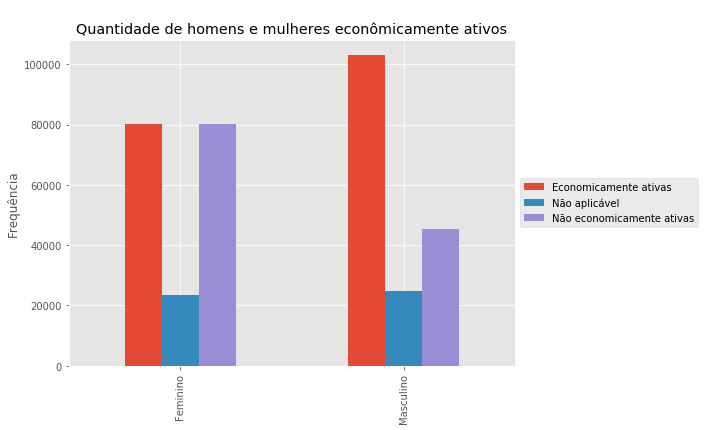

In [38]:
sexo_condicao2 = (pd.crosstab(df_2015.Sexo, df_2015["Condição de atividade"]))

#Criando uma tabela com os dados da condição econômica e os sexos:
plot = sexo_condicao2.plot(kind='bar',figsize=(8, 6))
ax = plt.subplot(111)
plt.title("\nQuantidade de homens e mulheres econômicamente ativos")
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Frequência')
plt.xlabel('')
plt.show()



### A idade influência a condição econômica da pessoa?

Primeiro vamos analisar as faixas de idade que as pessoas começaram a trabalhar:

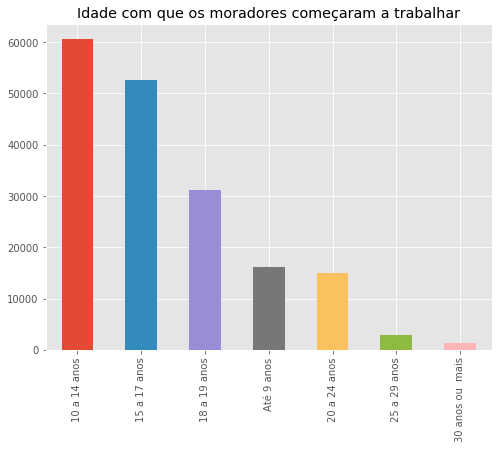

In [39]:
#Criando um gráfico com as faixas de idades que as pessoas começaram a trabalhar:
df_2015["Idade com que começou a trabalhar"].loc[df_2015["Idade com que começou a trabalhar"]!="Não aplicável"].value_counts().plot("bar", figsize=(8,6));
plt.title("Idade com que os moradores começaram a trabalhar")
plt.show()

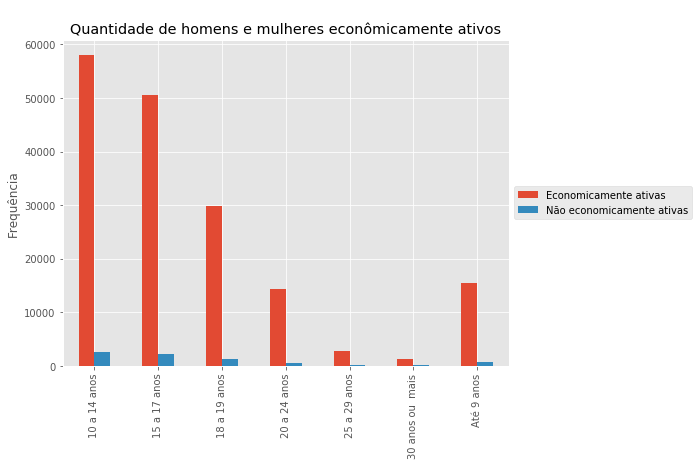

In [48]:
idade_condicao2 = (pd.crosstab(df_2015["Idade com que começou a trabalhar"].loc[df_2015["Idade com que começou a trabalhar"]!="Não aplicável"], df_2015["Condição de atividade"]))

#Criando uma tabela com os dados da condição econômica e os sexos:
plot = idade_condicao2.plot(kind='bar',figsize=(8, 6))
ax = plt.subplot(111)
plt.title("\nQuantidade de homens e mulheres econômicamente ativos")
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Frequência')
plt.xlabel('')
plt.show()

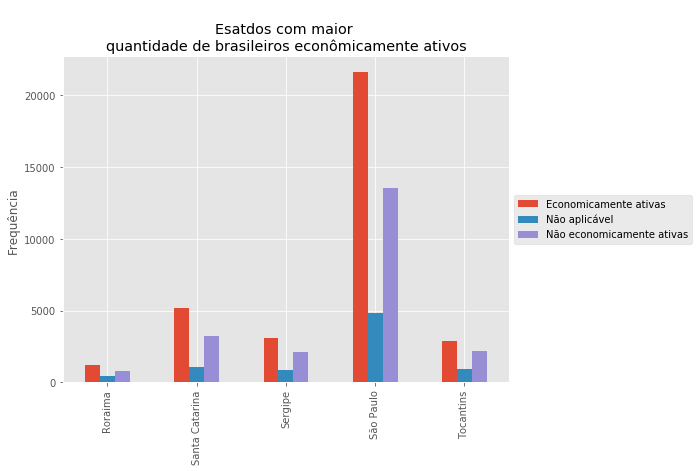

In [46]:
idade_condicao = (pd.crosstab(df_2015["UF"], df_2015["Condição de atividade"]))
plot = idade_condicao.tail(5).plot(kind="bar", figsize=(8,6))
ax = plt.subplot(111)
plt.title("\nEsatdos com maior \nquantidade de brasileiros econômicamente ativos")
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Frequência')
plt.xlabel('')
plt.show()

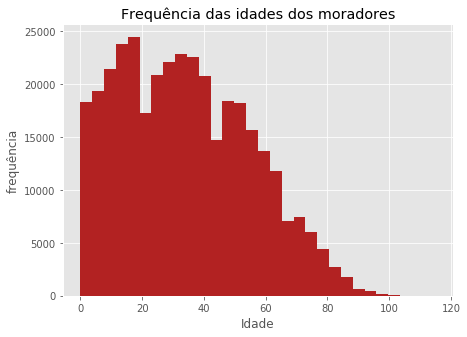

In [41]:
#
df_2015["Idade do morador"].plot.hist(bins=30, density = False, color="firebrick", figsize=(7, 5));
plt.title("Frequência das idades dos moradores")
plt.xlabel("Idade")
plt.ylabel("frequência")
plt.show()

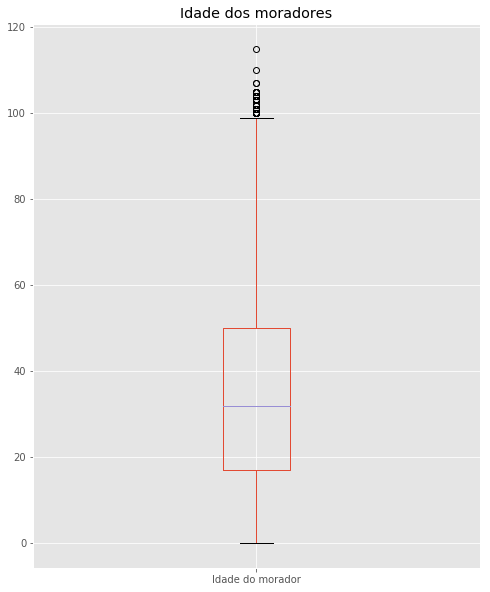

In [42]:
df_2015["Idade do morador"].plot("box", figsize=(8,10));
plt.title("Idade dos moradores")
plt.show()

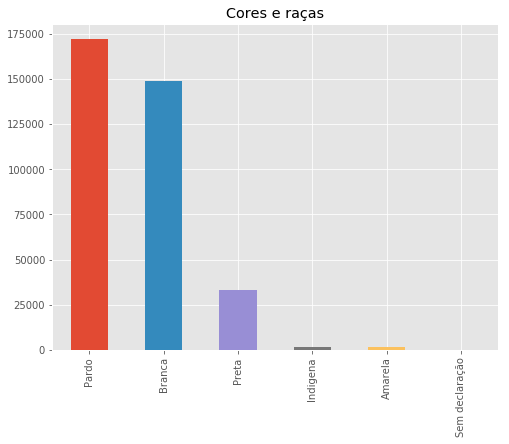

In [43]:
df_2015["Cor ou raça"].value_counts().plot("bar", figsize=(8,6));
plt.title("Cores e raças")
plt.show()

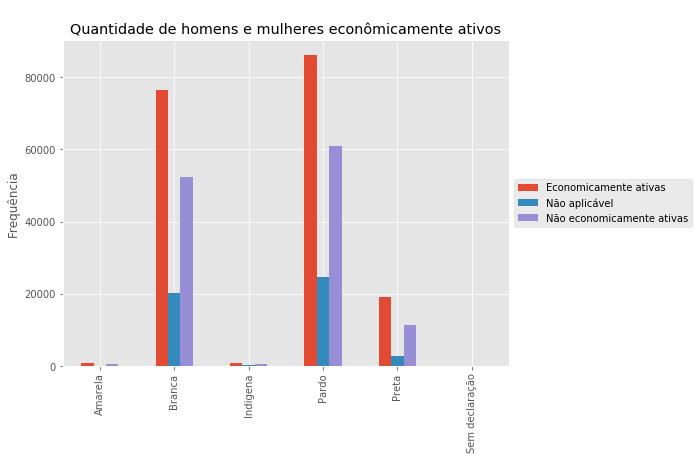

In [49]:
cor_condicao2 = (pd.crosstab(df_2015["Cor ou raça"], df_2015["Condição de atividade"]))

#Criando uma tabela com os dados da condição econômica e os sexos:
plot = cor_condicao2.plot(kind='bar',figsize=(8, 6))
ax = plt.subplot(111)
plt.title("\nQuantidade de homens e mulheres econômicamente ativos")
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Frequência')
plt.xlabel('')
plt.show()

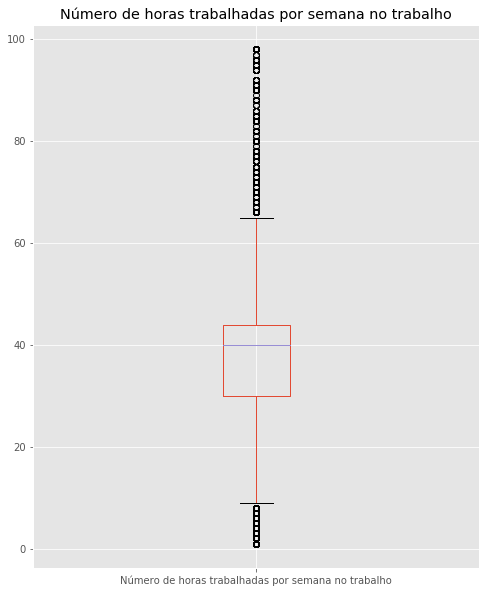

In [50]:
df_2015["Número de horas trabalhadas por semana no trabalho"].loc[df_2015["Número de horas trabalhadas por semana no trabalho"]!="Não aplicável"].plot("box", figsize=(8,10));
plt.title("Número de horas trabalhadas por semana no trabalho")
plt.show()

___
## Conclusão 

Com estas análises e gráficos podemos perceber diferença entre os grupos sociais e ver quais deles tem mais ou menos pessoas economicamente ativas.
Comparando homens e mulheres economicamente ativos, nós podemos ver não apenas uma maior quantidade de homens economicamente ativos como uma maior porcentagem de pessoas economicamente ativas que dentro do grupo feminino.
Quando analisamos a faixa etária que as pessoas começaram a trabalhar, o comportamento do gráfico se da de forma que a maior parte das pessoas começaram a trabalhar entre 10 a 14 anos e esta quantidade diminui conforme aumentamos a faixa etária. O mesmo comportamento ocorre quando analisamos as pessoas economicamente ativas dentro de cada um destes grupos.
Quando olhamos para os estados , São Paulo é o com a maior quantidade de pessoas ativas mas não podemos deixar se enganar com isso , pois São Paulo também é o estado com o maior numero de pessoas não economicamente ativas , sendo assim , não podemos afirmar que este estado tem a maior porcentagem de economicamente ativos dentro da sua população. 
Por último, podemos ver que ao se tratar de cor e etnias, a ordem de maior par menor quantidade de pessoas pertencentes ao grupo é , pardos sendo em maior quantidade , seguido de brancos , pretos , indígenas e por fim amarelos . A mesma ordem se da para analisar qual desses grupos tem uma maior quantidade de pessoas economicamente ativas.